Q1. Explain the difference between linear regression and logistic regression models. Provide an example of
a scenario where logistic regression would be more appropriate.

->Linear regression find the best fit line wheareas logistic regression find a best fit line and than squash it , we use a sigmoid function for it . If the best fit line .In the below example we can see the value of the output is only 0 and 1 but the best fit line of the linear regression is exceeding the value of the output also if there are outliers in the dataset than the best fit line plotted using the simple linear regression gives the wrong answer.

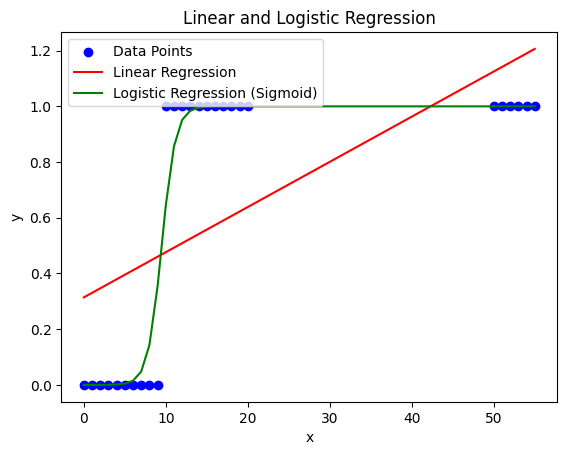

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np

# Creating the DataFrame
data = {
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 50, 51, 52, 53, 54, 55],
    'y': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# Reshape x for scikit-learn input
X = df['x'].values.reshape(-1, 1)
y = df['y'].values

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_reg_line = linear_reg.predict(X)

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X, y)
logistic_reg_line = logistic_reg.predict_proba(X)[:, 1]

# Plotting the data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plotting the best fit line for Linear Regression
plt.plot(X, linear_reg_line, color='red', label='Linear Regression')

# Plotting the best fit line for Logistic Regression
plt.plot(X, logistic_reg_line, color='green', label='Logistic Regression (Sigmoid)')

# Adding labels and legend
plt.title('Linear and Logistic Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Display the plot
plt.show()


Q2. What is the cost function used in logistic regression, and how is it optimized?

-> The cost function in logistic regression is the log loss function it is optimized by increasing its value , Log loss function is the log of the probability of the correct answer . It is optimized by find the global maximma of the concave downward parabola that we have got .

Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.

->Regularization is the process where we make a slight change in the cost function by adding a regularization term ,there are three types of regularization l1 , l2 and l3 . L1 regularization is the lasso regression which is use for feature selection and removing the term that are less relevant to predict the output. L2 regularization is used to remove multicollinearity thereby avoiding overfitting and L3 regularizatio is the Elastic net regression where we add both l1 and l2 term to the cost function.Regularization helps in removing the overfitting by feature selection thereby dropping the feature 

Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression
model?

->The ROC curve evaluates how well a logistic regression model distinguishes between positive and negative classes by plotting sensitivity against 1-specificity at various thresholds. The AUC-ROC summarizes this performance, with higher values indicating better model discrimination (max AUC = 1).

Q5. What are some common techniques for feature selection in logistic regression? How do these
techniques help improve the model's performance?

-> Grid search cv , random search cv and l1 regularization are some of the common techniques for the feature selection . Grid search cv and random search cv improves the accuracy by evaluating the models performance for each and every parameter and eventually selecting the parameter giving the highest accuracy wheareas L1 regularization helps to improve the models accuracy by droping the feature which are not relevant and thereby avoid overfitting.

Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing
with class imbalance?

-> Yes , I can handle the imblanced dataset in logistic regression , I can handle it by simply plotting the signmoid function of the logistic regression , because of the squashing that takes place in the sigmoid function the imbalanced dataset is handled . However this method is only suited if the value of the output feature changes abruptly for the given value of y as shown below , However under such sitution we can try different techniques such as upsampling , downsampling and smote to handle imbalanced dataset.

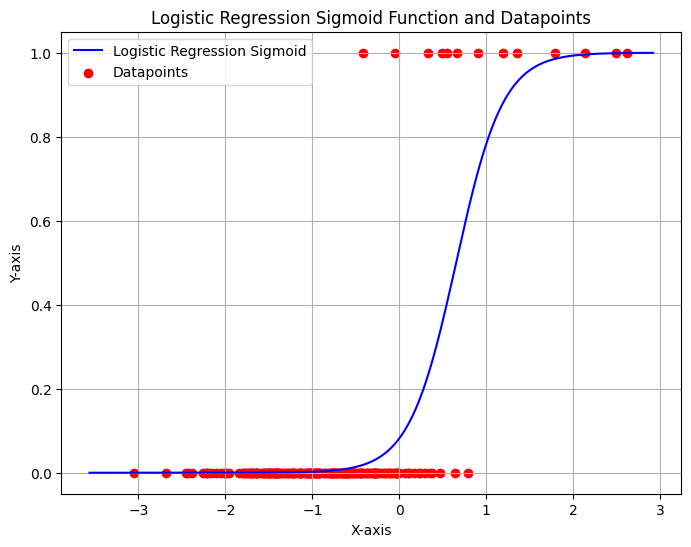

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create an imbalanced dataset
X, y = make_classification(
    n_samples=1000, n_features=1, n_informative=1, n_redundant=0,
    n_clusters_per_class=1, weights=[0.95], flip_y=0, random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Plot the logistic regression sigmoid function
plt.figure(figsize=(8, 6))

# Plot the sigmoid function
x_vals = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_vals = model.predict_proba(x_vals)[:, 1]
plt.plot(x_vals, y_vals, label='Logistic Regression Sigmoid', color='blue')

# Plot the datapoints
plt.scatter(X_test, y_test, color='red', marker='o', label='Datapoints')

# Set labels and title
plt.title('Logistic Regression Sigmoid Function and Datapoints')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


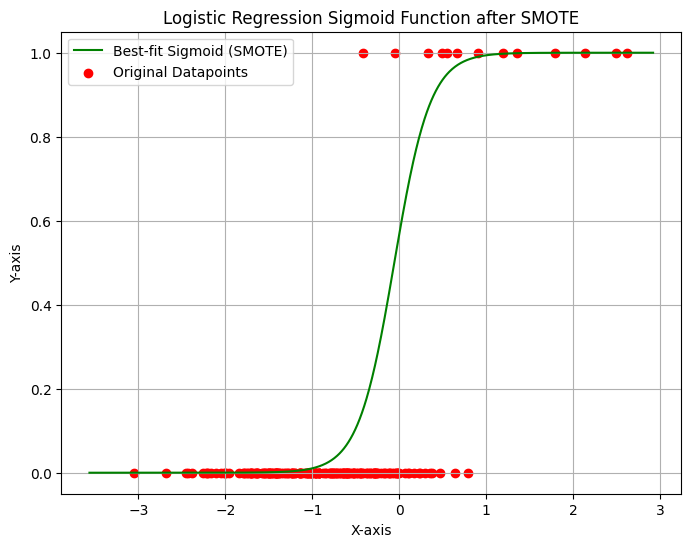

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Create an imbalanced dataset
X, y = make_classification(
    n_samples=1000, n_features=1, n_informative=1, n_redundant=0,
    n_clusters_per_class=1, weights=[0.95], flip_y=0, random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform SMOTE on the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Plot the best-fit sigmoid function
plt.figure(figsize=(8, 6))

# Plot the sigmoid function on the resampled data
x_vals_resampled = np.linspace(X_resampled.min(), X_resampled.max(), 1000).reshape(-1, 1)
y_vals_resampled = model.predict_proba(x_vals_resampled)[:, 1]
plt.plot(x_vals_resampled, y_vals_resampled, label='Best-fit Sigmoid (SMOTE)', color='green')

# Plot the original datapoints
plt.scatter(X_test, y_test, color='red', marker='o', label='Original Datapoints')

# Set labels and title
plt.title('Logistic Regression Sigmoid Function after SMOTE')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


Q7. Can you discuss some common issues and challenges that may arise when implementing logistic
regression, and how they can be addressed? For example, what can be done if there is multicollinearity
among the independent variables?

-> Multicollinearity : It can be handled by using L2 regularization 

Overfitting : It can be handled by dropping the datapoints that are causing the overfitting, using L2 regularization or by creating fake datapoints so that the best fit curve does not deviate from a general best fit curve

Imbalance dataset : we can do smote , upsampling , downsampling 

changes in the value of y repeatedly after frequent intervals of the input data: training our model for the differnt value of x and then combinging them , for different value of x , different model will be used


